In [24]:
import os
import aniposelib
import anipose
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
board = aniposelib.boards.CharucoBoard(squaresX=6, squaresY=6,
                                        square_length=24.33, marker_length=17, marker_bits=5, dict_size=50)

In [23]:
videopath = '/Users/etytel01/Documents/2022/FishCar_calibration/CalibrationFiles/CalibrationVideos/'
videonames = ['9.5.22Calib-camA.mp4', '9.5.22Calib-camB.mp4', '9.5.22Calib-camC.mp4']

In [5]:
video1 = os.path.join(videopath, videonames[0])
rows = board.detect_video(video1, progress=True)

100%|█████████████████████████████| 1686/1686 [00:41<00:00, 41.05it/s]


In [6]:
cap = cv2.VideoCapture(video1)

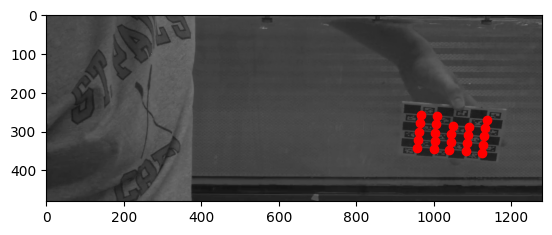

In [7]:
i = 1500
fr = rows[i]['framenum']

cap.set(1, fr)
ret, frame = cap.read()

fig, ax = plt.subplots()
ax.imshow(frame)
ax.plot(rows[i]['corners'][:,0,0], rows[i]['corners'][:,0,1], 'ro')

In [8]:
cap.release()

In [25]:
camdf = []

for camnum, video1 in enumerate(videonames):
    print(video1)
    fn = os.path.join(videopath, video1)

    rows = board.detect_video(fn, progress=True)

    for row1 in rows:
        df1 = pd.DataFrame(data={'id': row1['ids'][:,0], 'x': row1['corners'][:,0,0], 'y': row1['corners'][:,0,1]})
        df1['frame'] = row1['framenum']
        df1['camera'] = camnum
        camdf.append(df1)


9.5.22Calib-camA.mp4


100%|█████████████████████████████| 1686/1686 [00:49<00:00, 34.39it/s]


9.5.22Calib-camB.mp4


100%|█████████████████████████████| 1686/1686 [02:13<00:00, 12.61it/s]


9.5.22Calib-camC.mp4


100%|█████████████████████████████| 1686/1686 [01:36<00:00, 17.48it/s]


In [26]:
dfall = pd.concat(camdf, ignore_index=True)

In [27]:
dfall.head()

,id,x,y,frame,camera
0,0,279.253723,241.394455,0,0
1,1,241.115707,225.193253,0,0
2,2,202.942612,208.560669,0,0
3,3,165.062302,192.044556,0,0
4,4,127.176628,175.538330,0,0


In [28]:
dfall.tail()

,id,x,y,frame,camera
120772,20,960.814270,262.089569,1685,2
120773,21,897.880981,268.645142,1685,2
120774,22,835.034607,275.601898,1685,2
120775,23,771.419006,281.569031,1685,2
120776,24,707.825256,288.267090,1685,2


In [29]:
dfall.to_csv('boards.csv')